In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def download_stock_data(symbols, start_date, end_date):
    data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']
    return data


def plot_adj_close_prices(adj_close_data, symbols):
    for symbol in symbols:
        plt.plot(adj_close_data.index, adj_close_data[symbol], label=symbol)

    plt.title('Adjusted Close Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price')
    plt.legend()
    plt.show()


def plot_adj_close_prices_individual(adj_close_data, symbols):
    for symbol in symbols:
        plt.figure()  # Create a new figure for each company
        plt.plot(adj_close_data.index, adj_close_data[symbol])
        plt.title(f'Adjusted Close Prices for {symbol} Over Time')
        plt.xlabel('Date')
        plt.ylabel('Adjusted Close Price')
        plt.show()


# 1. Point

[                       0%%                      ]

[*********************100%%**********************]  3 of 3 completed


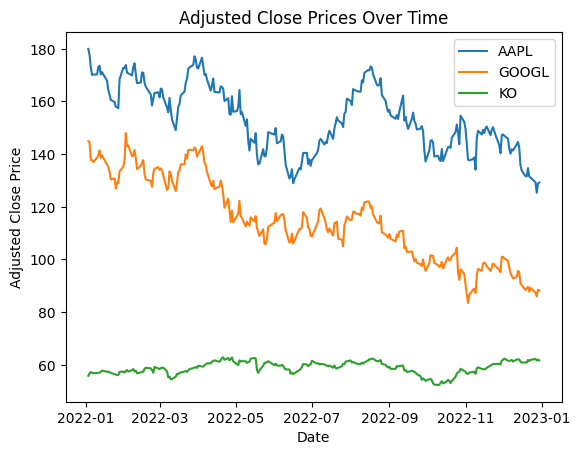

In [4]:
if __name__ == "__main__":
    stocks = ["AAPL", "GOOGL", "KO"]
    start_date = "2022-01-01"
    end_date = "2023-01-01"
    stock_data = download_stock_data(stocks, start_date, end_date)
    plot_adj_close_prices(stock_data, stocks)


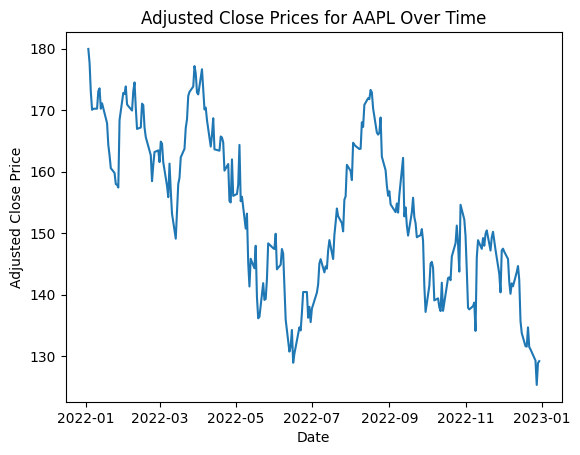

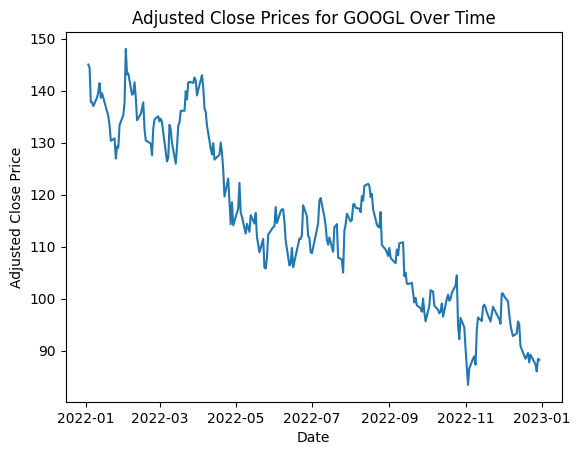

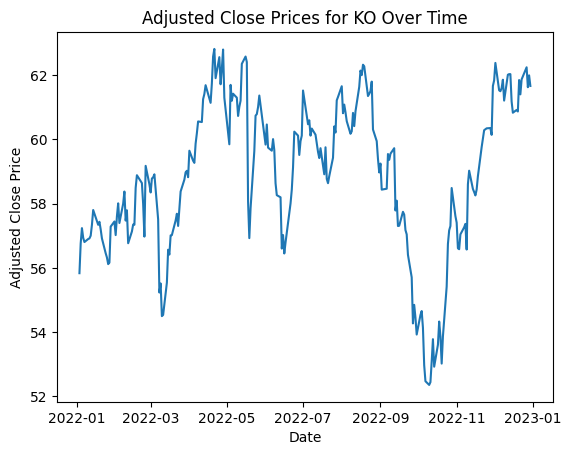

In [8]:
plot_adj_close_prices_individual(stock_data, stocks)

## 2. Point

In [11]:
def calculate_average_daily_return(adj_close_data):
    daily_returns = adj_close_data.pct_change()
    average_daily_return = daily_returns.mean()
    return average_daily_return
    
calculate_average_daily_return(stock_data) 

AAPL    -0.001074
GOOGL   -0.001689
KO       0.000475
dtype: float64

In [12]:
def calculate_average_daily_return_manual(adj_close_data):
    # Calculate daily returns without using pct_change
    daily_returns = (adj_close_data / adj_close_data.shift(1)) - 1
    average_daily_return = daily_returns.mean()
    return average_daily_return

calculate_average_daily_return_manual(stock_data)

AAPL    -0.001074
GOOGL   -0.001689
KO       0.000475
dtype: float64

In [13]:
def calculate_correlation(adj_close_data):
    correlation_matrix = adj_close_data.corr()
    return correlation_matrix

calculate_correlation(stock_data)

,AAPL,GOOGL,KO
AAPL,1.000000,0.818155,0.051988
GOOGL,0.818155,1.000000,-0.036496
KO,0.051988,-0.036496,1.000000


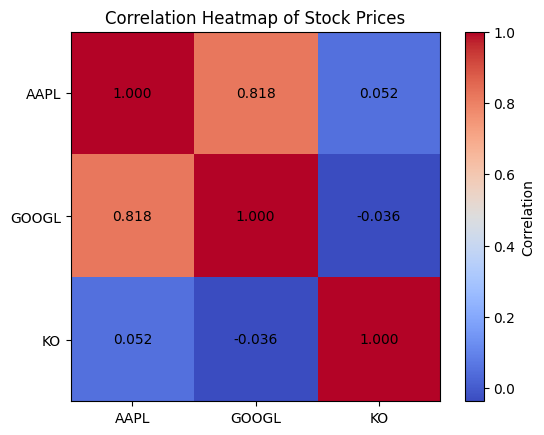

In [16]:
def plot_correlation_heatmap(correlation_matrix, symbols):
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

    for i in range(len(symbols)):
        for j in range(len(symbols)):
            plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}', ha='center', va='center', color='black')

    plt.colorbar(label='Correlation')
    plt.xticks(range(len(symbols)), symbols)
    plt.yticks(range(len(symbols)), symbols)
    plt.title('Correlation Heatmap of Stock Prices')
    plt.show()

plot_correlation_heatmap(calculate_correlation(stock_data), stocks)